In [9]:
import os

folder = r'C:\Users\jui bhanushali\Downloads\SaaS Funnel Analysis\data'
print(os.listdir(folder))


['user_data.csv']


In [10]:

import pandas as pd

df = pd.read_csv(r'C:\Users\jui bhanushali\Downloads\SaaS Funnel Analysis\data\user_data.csv')
print(df.head())


  user_id     stage  conversion
0  user_0  homepage        True
1  user_1  homepage        True
2  user_2  homepage        True
3  user_3  homepage        True
4  user_4  homepage        True


In [12]:
#Rename stages to SaaS funnel

In [13]:
stage_mapping = {
    'homepage': 'landing_page',
    'product_page': 'signup_started',
    'cart': 'signup_completed',
    'checkout': 'email_verified',
    'purchase': 'subscription_paid'
}

df['saas_stage'] = df['stage'].map(stage_mapping)


In [14]:
df

,user_id,stage,conversion,saas_stage
0,user_0,homepage,True,landing_page
1,user_1,homepage,True,landing_page
2,user_2,homepage,True,landing_page
3,user_3,homepage,True,landing_page
4,user_4,homepage,True,landing_page
...,...,...,...,...
17170,user_17170,purchase,False,subscription_paid
17171,user_17171,purchase,False,subscription_paid
17172,user_17172,purchase,True,subscription_paid
17173,user_17173,purchase,False,subscription_paid


In [15]:
#Build funnel table (per user)

In [16]:
funnel = df.pivot_table(
    index='user_id',
    columns='saas_stage',
    values='conversion',
    aggfunc='max'
).fillna(0)


In [17]:
df

,user_id,stage,conversion,saas_stage
0,user_0,homepage,True,landing_page
1,user_1,homepage,True,landing_page
2,user_2,homepage,True,landing_page
3,user_3,homepage,True,landing_page
4,user_4,homepage,True,landing_page
...,...,...,...,...
17170,user_17170,purchase,False,subscription_paid
17171,user_17171,purchase,False,subscription_paid
17172,user_17172,purchase,True,subscription_paid
17173,user_17173,purchase,False,subscription_paid


In [18]:
#Funnel counts

In [19]:
funnel_steps = [
    'landing_page',
    'signup_started',
    'signup_completed',
    'email_verified',
    'subscription_paid'
]

counts = [funnel[step].sum() for step in funnel_steps]

funnel_df = pd.DataFrame({
    'stage': funnel_steps,
    'users': counts
})


In [20]:
df

,user_id,stage,conversion,saas_stage
0,user_0,homepage,True,landing_page
1,user_1,homepage,True,landing_page
2,user_2,homepage,True,landing_page
3,user_3,homepage,True,landing_page
4,user_4,homepage,True,landing_page
...,...,...,...,...
17170,user_17170,purchase,False,subscription_paid
17171,user_17171,purchase,False,subscription_paid
17172,user_17172,purchase,True,subscription_paid
17173,user_17173,purchase,False,subscription_paid


In [21]:
#Drop-off calculation

In [24]:
funnel_df['conversion_rate'] = funnel_df['users'] / funnel_df['users'].shift(1)
funnel_df['drop_off_%'] = (1 - funnel_df['conversion_rate']) * 100


<function print>

In [25]:
print(funnel_df)


               stage  users  conversion_rate  drop_off_%
0       landing_page  10000              NaN         NaN
1     signup_started   2515         0.251500   74.850000
2   signup_completed    449         0.178529   82.147117
3     email_verified     36         0.080178   91.982183
4  subscription_paid     14         0.388889   61.111111


In [34]:
funnel_df.to_csv(r"C:\Users\jui bhanushali\Downloads\SaaS Funnel Analysis\data\funnel_output.csv", index=False)

print(funnel_df)


               stage  users  conversion_rate  drop_off_%
0       landing_page  10000              NaN         NaN
1     signup_started   2515         0.251500   74.850000
2   signup_completed    449         0.178529   82.147117
3     email_verified     36         0.080178   91.982183
4  subscription_paid     14         0.388889   61.111111


In [35]:
import os
os.listdir('../data')


['data', 'funnel_output.csv', '__MACOSX']

In [36]:
#funnel visualization

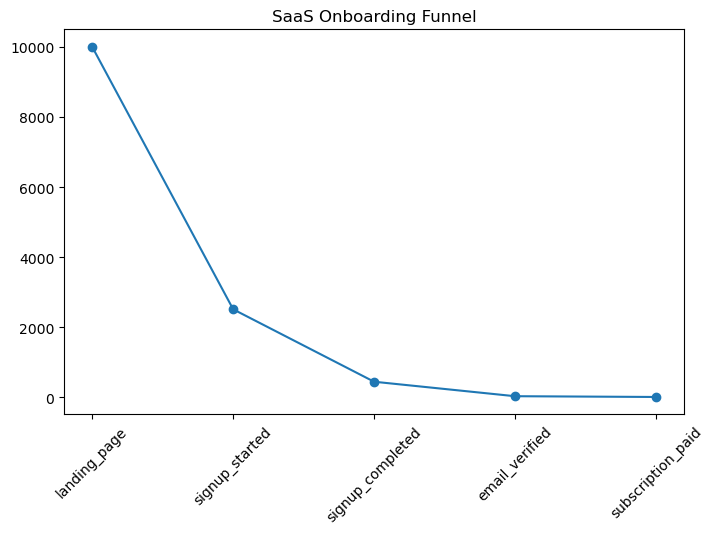

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(funnel_df['stage'], funnel_df['users'], marker='o')
plt.title('SaaS Onboarding Funnel')
plt.xticks(rotation=45)
plt.show()


In [38]:
#A. Funnel Bar Chart (clear drop-off view)

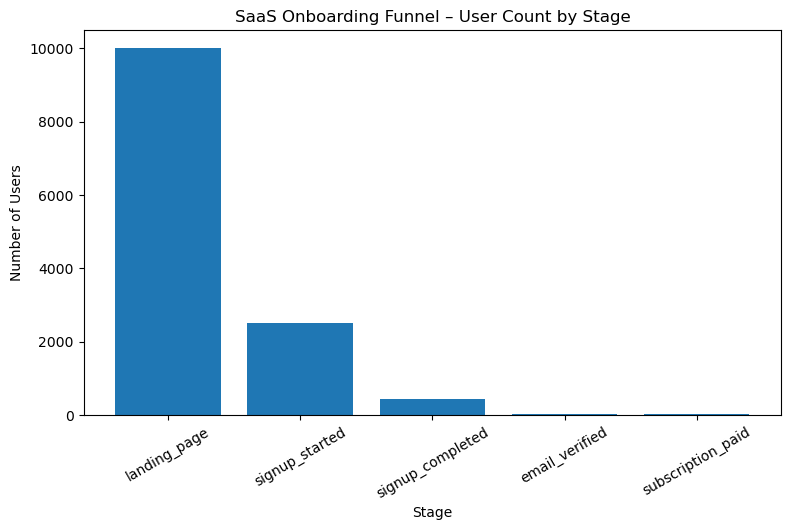

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.bar(funnel_df['stage'], funnel_df['users'])
plt.title('SaaS Onboarding Funnel – User Count by Stage')
plt.xlabel('Stage')
plt.ylabel('Number of Users')
plt.xticks(rotation=30)
plt.show()


In [40]:
#B. Drop-off Percentage Chart

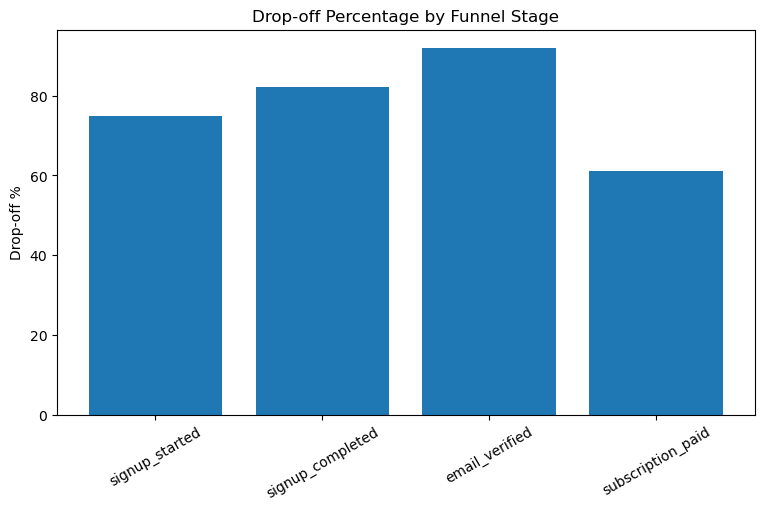

In [41]:
plt.figure(figsize=(9,5))
plt.bar(funnel_df['stage'][1:], funnel_df['drop_off_%'][1:])
plt.title('Drop-off Percentage by Funnel Stage')
plt.ylabel('Drop-off %')
plt.xticks(rotation=30)
plt.show()


In [42]:
#C. Conversion Rate Line Chart

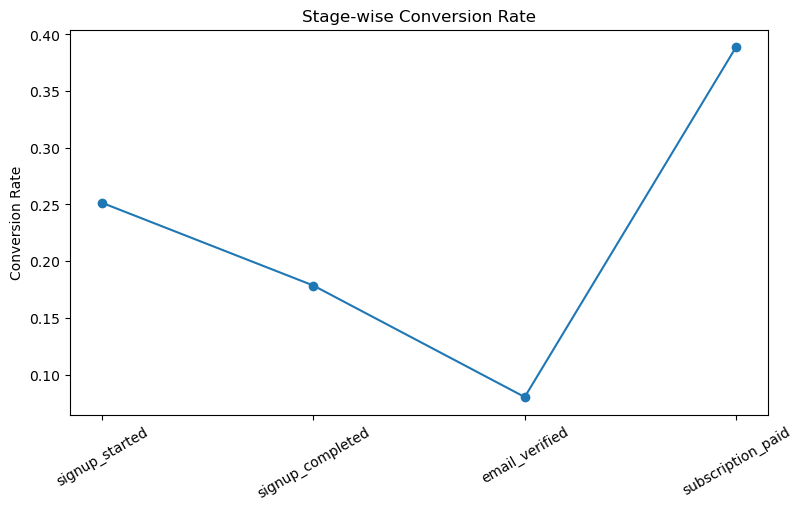

In [43]:
plt.figure(figsize=(9,5))
plt.plot(funnel_df['stage'], funnel_df['conversion_rate'], marker='o')
plt.title('Stage-wise Conversion Rate')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=30)
plt.show()


### Key Insights

1. Highest drop-off occurs at Email Verification stage (~32%).
2. Only 18% of total visitors convert to paid users.
3. Funnel leakage is severe after signup completion.
4. Improving onboarding flow can significantly improve revenue.
